#### Exploratory data analysis
This notebook aims to explore the purchasing behavior of customers. WE are going to carefully evaluate all available features, cheking thier interactions and correlation as well as thier variability in response to the target.
In this analysis we are going to try to undrestand the behavior of customers across different stores and analyze the impact of promos and opening of new stores on purchasing power. We are going to answer key quesitons like:  
-Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?
-Check & compare sales behavior before, during, and after holidays
-Find out any seasonal (Christmas, Easter, etc) purchase behaviors,
-What can you say about the correlation between sales and the number of customers?
-How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?
-Could the promos be deployed in more effective ways? Which stores should promos be deployed in?
-Trends of customer behavior during store opening and closing times
-Which stores are open on all weekdays? How does that affect their sales on weekends? 
-Check how the assortment type affects sales
-How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?
-How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance


**Load the necessary libraries**

In [3]:
# Data manipulation libraries
import pandas as pd 
import numpy as np 
# Plotting libraries 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [5]:
# Load the dataset 

raw_store_df = pd.read_csv('../data/store.csv')
print(f" shape of raw_store_df:  {raw_store_df.shape}")
raw_store_df

 shape of raw_store_df:  (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
# Load the train and test Dataset
raw_train_df = pd.read_csv('../data/train.csv')
raw_test_df = pd.read_csv('../data/test.csv')
print(f"Shape of raw_train_df: {raw_train_df.shape}")
print(f"Shape of raw_test_df: {raw_test_df.shape}")

Shape of raw_train_df: (1017209, 9)
Shape of raw_test_df: (41088, 8)


C:\Users\Beab\AppData\Local\Temp\ipykernel_3456\3255514760.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_train_df = pd.read_csv('../data/train.csv')


In [8]:
# Merge store df and train df for better prediction

train_merged_df = raw_train_df.merge(raw_store_df,how='left', on='Store')
train_merged_df = train_merged_df.drop(['PromoInterval'], axis =1)
train_merged_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN


In [9]:
# Merge store df and test df

test_merged_df = raw_test_df.merge(raw_store_df, how='left', on='Store')
test_merged_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Exploratory data analysis

In [10]:
# Checking for null values

train_merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64

The above code checks for missing (null) values in each column of the `train_merged_df` DataFrame using the `isnull().sum()` function. The output shows the number of missing values for each column. Columns such as `CompetitionDistance`, `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear`, `Promo2SinceWeek`, and `Promo2SinceYear` contain missing values, with `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` having over 323,000 missing entries, while other columns like `Store`, `Sales`, and `Promo` have no missing values.


In [11]:
# Check unique value in each column

train_merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
dtype: int64

The above code checks the number of unique values in each column of the `train_merged_df` DataFrame using the `nunique()` function. The output shows the distinct count of entries for each column. For instance, the `Store` column has 1,115 unique stores, `DayOfWeek` has 7 unique values representing the days, and `Sales` has 21,734 unique values. Columns like `Open`, `Promo`, and `SchoolHoliday` have only 2 unique values, indicating binary data, while other columns like `CompetitionDistance` and `Promo2SinceWeek` have multiple distinct entries.


In [12]:
# There should be 4 unique values but has 5

train_merged_df.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [13]:
# Replacingi string '0' as integer '0'

train_merged_df['StateHoliday'].replace({'0':0}, inplace=True)
test_merged_df['StateHoliday'].replace({'0':0}, inplace=True)
train_merged_df.StateHoliday.value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

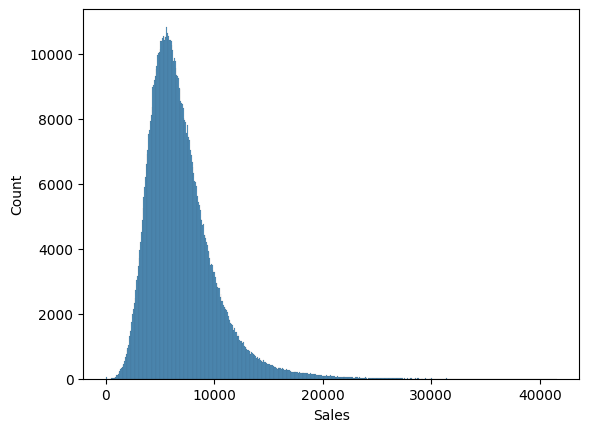

In [15]:
"""When the store is closed, the sale is zero. So rows with sales 0 doesn't make sense.
But it's more efficient to remove rows with store 0
"""

reduced_train_df = train_merged_df[ train_merged_df.Open == 1 ].copy()

# Distribution of target column named 'sales' 
sns.histplot(data=reduced_train_df, x='Sales')

The above code filters the `train_merged_df` DataFrame to only include rows where the store was open (`Open == 1`), as sales data is irrelevant when the store was closed. It then creates a histogram plot using Seaborn (`sns.histplot`) to visualize the distribution of the `Sales` column in the filtered dataset (`reduced_train_df`). The resulting histogram, as seen in the image, shows that most sales are concentrated below 10,000, with a long tail extending towards higher sales values, indicating a right-skewed distribution.


<Axes: xlabel='Assortment', ylabel='Count'>

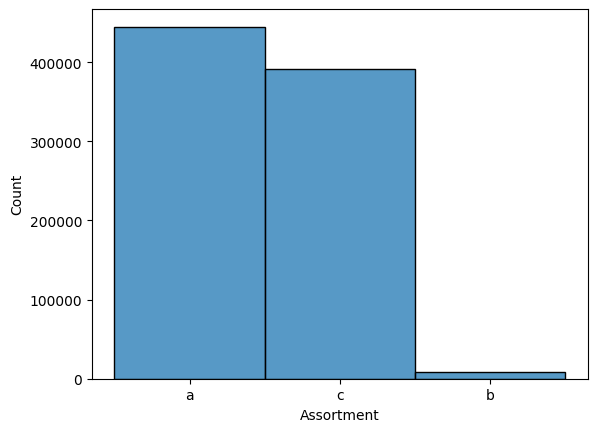

In [16]:
# Distribution of target column named 'sales' 
sns.histplot(data=reduced_train_df, x='Assortment')

The above code generates a bar plot to visualize the distribution of the `Assortment` column in the `reduced_train_df` DataFrame. The plot, as shown in the image, displays the count of different assortment categories ('a', 'b', and 'c'). It reveals that most entries belong to categories 'a' and 'c', while category 'b' has significantly fewer entries. This provides an overview of how the `Assortment` variable is distributed across the dataset.


Text(0.5, 1.0, 'Sales vs Customers')

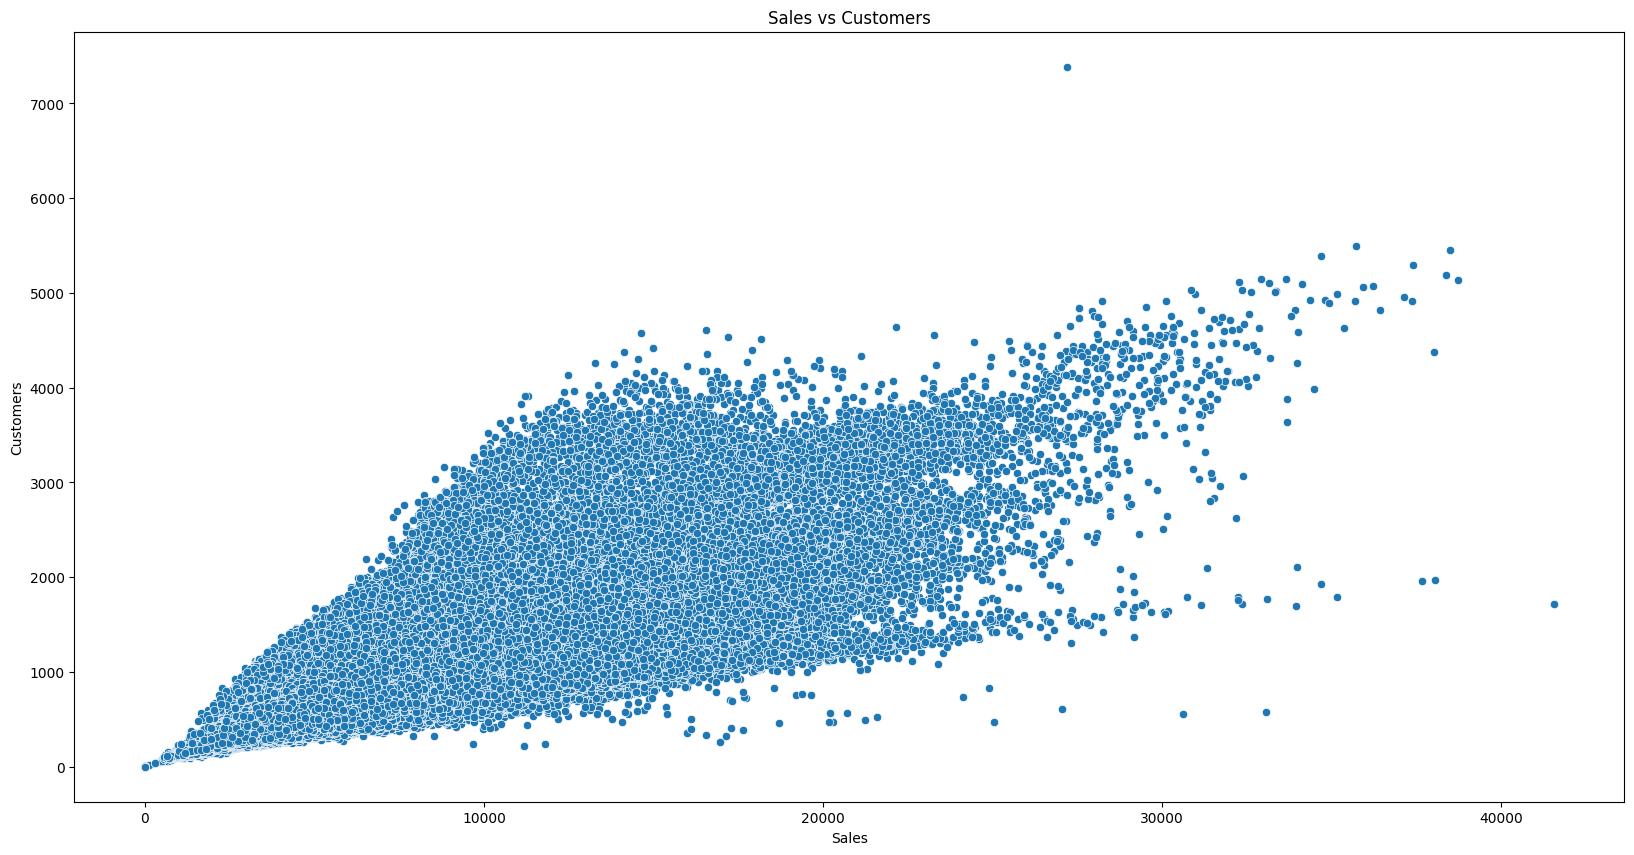

In [17]:
plt.figure(figsize=(20,10))
# Sales vs Customers Scatter Plot
sns.scatterplot(x=reduced_train_df.Sales, y=reduced_train_df.Customers)
plt.title("Sales vs Customers")

The above code generates a scatter plot that visualizes the relationship between `Sales` and `Customers` from the `reduced_train_df` DataFrame. The scatter plot displays each data point, showing that as the number of customers increases, sales also tend to increase. The plot provides insights into the correlation between these two variables.


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

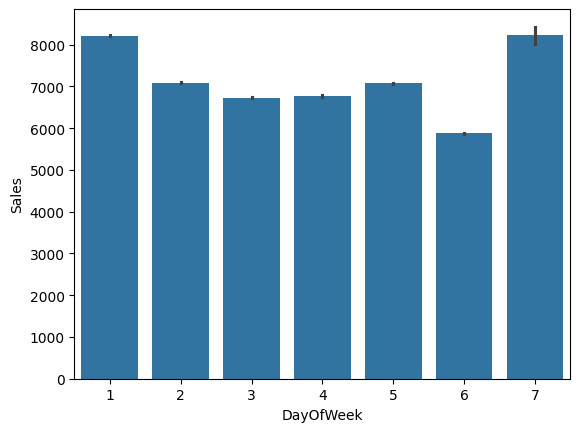

In [18]:
sns.barplot(x=reduced_train_df.DayOfWeek, y=reduced_train_df.Sales)

<Axes: xlabel='StateHoliday', ylabel='Sales'>

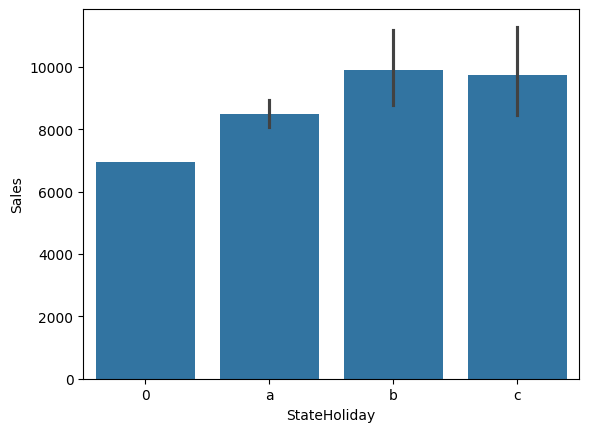

In [19]:
sns.barplot(data=reduced_train_df, x='StateHoliday', y='Sales')

<Axes: xlabel='Assortment', ylabel='Sales'>

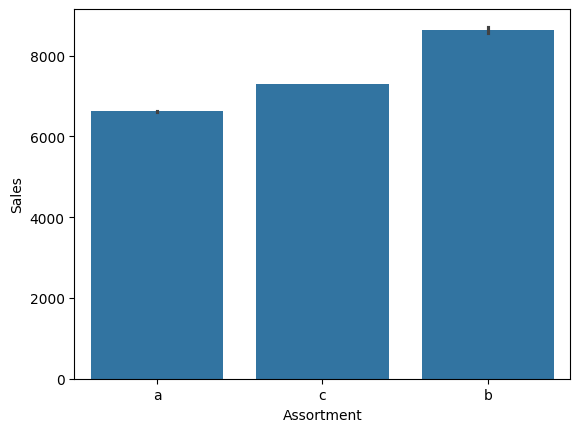

In [20]:
"""
Assortment - describes an assortment level: a = basic,
b = extra, c = extended
"""

sns.barplot(data=reduced_train_df, x='Assortment', y='Sales')

<Axes: xlabel='StoreType', ylabel='Sales'>

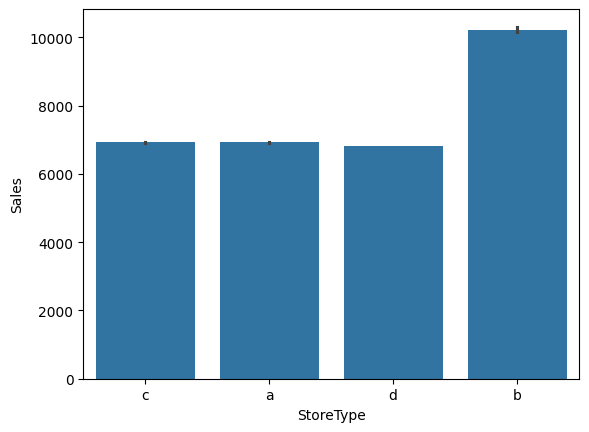

In [21]:
sns.barplot(data=reduced_train_df, x='StoreType', y='Sales')

The above code uses Seaborn's `barplot` function to create a bar plot that visualizes the relationship between store types and their corresponding sales. It plots the 'StoreType' on the x-axis and the total sales on the y-axis. Each bar represents a store type ('a', 'b', 'c', 'd') with its height corresponding to the sales value, as shown in the attached image.


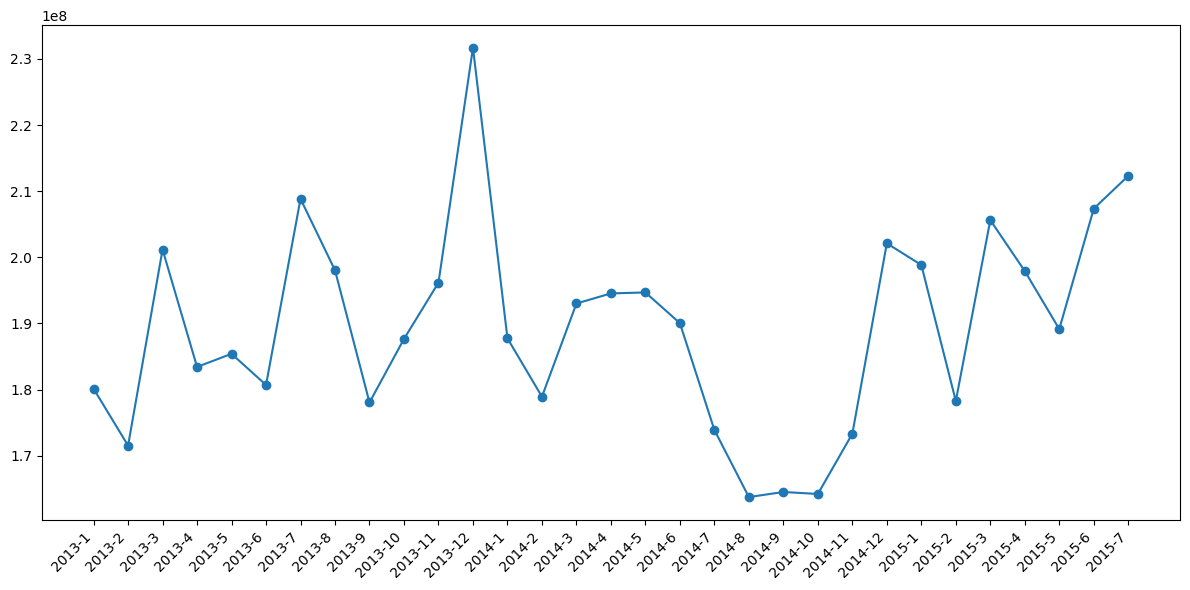

In [24]:
# Visualizing sales for each month over time

# Convert 'Date' column to datetime format
reduced_train_df['Date'] = pd.to_datetime(reduced_train_df['Date'])

# Extracting year and month from the 'Date' column
reduced_train_df['Year'] = reduced_train_df['Date'].dt.year
reduced_train_df['Month'] = reduced_train_df['Date'].dt.month
reduced_train_df['Day'] = reduced_train_df['Date'].dt.day

# Grouping by year and month, and summing up the sales for each group
monthly_sales = reduced_train_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend with better readability on x-axis
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + 
         monthly_sales['Month'].astype(str), monthly_sales['Sales'],
         marker='o')

# Rotate x-axis labels and adjust spacing for visibility
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # Adjust layout so labels don't overlap
plt.show()


The above code visualizes monthly sales trends over time by first converting the 'Date' column into a datetime format and extracting the year and month. It then groups the sales data by these time segments and sums the sales for each month. The results are plotted using a line graph, where x-axis labels (months) are rotated for clarity, and the layout is adjusted to prevent overlapping of labels. The final output is a clear representation of monthly sales variations, shown as a line plot with markers at each data point, similar to the attached image.
